# ML-CUP with SGD, BFGS and L-BFGS
1) Load dataset

2) Train models
    - SGD error curve
    - BFGS error curve
    - L-BFGS error curve
3) Optimization plots
    - norm gradient
    - relative loss (gap)
    - condition number
    - alpha
4) Machine Learning plots
    - all training and validation error plots

In [1]:
from Validation import *
from time import time
from utils import *
from grid_search import *
from Neural_network import *
from sklearn.preprocessing import normalize, scale

### 1) Load ML-Cup dataset

In [2]:
# 1. read file train set
df = pd.read_csv("../Data/MLCup/ML-CUP17-TR_shuffled.csv", comment='#')
#df = pd.read_csv("../Data/MLCup/ML-CUP17-TR.csv", comment='#')
features_col = ["input1","input2","input3","input4","input5",
                "input6","input7", "input8","input9","input10"]
targets_col = ["target_x", "target_y"]

# 2. divide pattern and targets
patterns, labels = divide_patterns_labels(df,features_col,targets_col)

# 3. divide in development set and test set
X_train, Y_train, X_test, Y_test = holdout_cup(patterns, labels, fraction_tr=0.8)

In [3]:
architecture = [10, 5, 2]
neurons = [InputNeuron, TanHNeuron, OutputNeuron]
loss_object = SquaredError()#EuclideanError()
common_network = Network(architecture, neurons)

### 2) Train models

## SGD - cup

In [4]:
learning_rate = 0.01
momentum = 0.9
lambda_ = 0.05
batch_size = 32 #len(X_train)
epsilon = 1e-5
epochs = 1000
network = copy.deepcopy(common_network)

In [5]:
tic = time()
# 5. train
loss_tr_sgd, error_tr_sgd, miss_train, \
loss_ts_sgd, miss_test, norm_gradients_sgd = network.train_SGD(x_train=X_train, 
                                         y_train=Y_train, 
                                         x_test=X_test,
                                         y_test=Y_test,
                                         lossObject=loss_object,
                                         epochs=epochs, 
                                         learning_rate=learning_rate, 
                                         batch_size=batch_size,
                                         momentum=momentum, 
                                        regularization=lambda_, epsilon=epsilon)
toc = time()

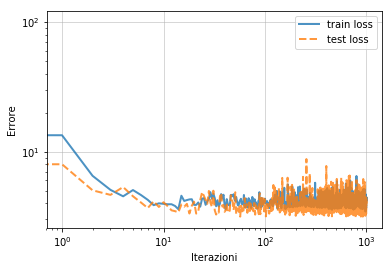

error train: 4.34150978420447
error test: 4.1110961433578055
training time: 151.88549614
norm gradient last: 0.908393358442863
iterazioni: 1000


In [6]:
plot_train_test_learning_curve_loss(loss_ts_sgd, error_tr_sgd)
print "error train:", error_tr_sgd[-1]
print "error test:", loss_ts_sgd[-1] if len(loss_ts_sgd) > 0 else None
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_sgd[-1]
print "iterazioni:", len(error_tr_sgd)

## BFGS - cup

In [7]:
c_1 = 1e-4
c_2 = 0.9
theta = 0.9
lambda_ = 0.05
epsilon = 1e-5
epochs = 1000
network = copy.deepcopy(common_network)

In [8]:
tic = time()
loss_tr_bfgs, error_tr_bfgs, miss_tr, \
loss_ts_bfgs, miss_ts, alphas_bfgs, \
norm_gradients_bfgs, cond_bfgs = network.train_BFGS(x_train=X_train,
                                                    y_train=Y_train, 
                                                    x_test=X_test,
                                                    y_test=Y_test,
                                                    theta=theta, c_1=c_1, c_2=c_2, 
                                                    lossObject=loss_object, 
                                                    regularization=lambda_, 
                                                    epochs=epochs, epsilon=epsilon,
                                                    line_search='wolfe', debug=True)
toc = time()

stop: gradient norm, epoch 89


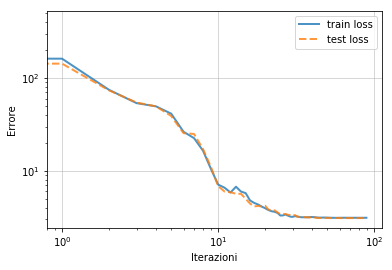

error train: 3.1242792648780577
error test: 3.1015113591819987
training time: 38.4777150154
norm gradient last: 9.32380237202422e-06
iterazioni: 90


In [9]:
plot_train_test_learning_curve_loss(loss_ts_bfgs, error_tr_bfgs)
print "error train:", error_tr_bfgs[-1]
print "error test:", loss_ts_bfgs[-1] if len(loss_ts_bfgs) > 0 else None
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_bfgs[-1]
print "iterazioni:", len(loss_tr_bfgs)

## L-BFGS - cup

In [10]:
c_1 = 1e-4
c_2 = 0.9
theta = 0.9
lambda_ = 0.05
epsilon = 1e-5
epochs = 1000
m = 5

network = copy.deepcopy(common_network)

In [11]:
tic = time()
loss_tr_lbfgs, error_tr_lbfgs, miss_tr, \
loss_ts_lbfgs, miss_ts, alphas_lbfgs, \
norm_gradients_lbfgs, cond_lbfgs = network.train_LBFGS(x_train=X_train,
                                                       y_train=Y_train,
                                                       x_test=X_test, 
                                                       y_test=Y_test,
                                                       theta=theta, 
                                                       c_1=c_1, 
                                                       c_2=c_2, 
                                                       lossObject=loss_object,
                                                       regularization=lambda_, 
                                                       epochs=epochs, 
                                                       epsilon=epsilon, m=m, 
                                                       line_search='wolfe', debug=True)
toc = time()

stop: norm gradient, epoch 201


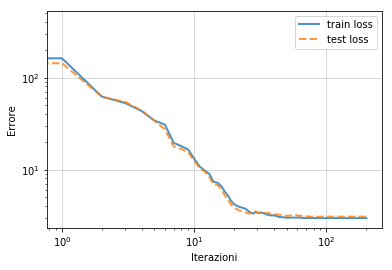

error train: 2.9681511066649655
error test: 3.077016479048926
training time: 65.3903479576
norm gradient last: 8.99172179485951e-06
iterazioni: 202


In [12]:
plot_train_test_learning_curve_loss(loss_ts_lbfgs, error_tr_lbfgs)
print "error train:", error_tr_lbfgs[-1]
print "error test:", loss_ts_lbfgs[-1] if len(loss_ts_lbfgs) > 0 else None
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_lbfgs[-1]
print "iterazioni:", len(loss_tr_lbfgs)

### 3) ML-CUP - optimization plots
- $|| \nabla E(w)||$ vs iterations
- $ |E(w) - E(w^*)| $ vs iterations
- step size $\alpha$ vs iterations (only for BFGS and L-BFGS)
- condition number vs iterations (only for BFGS)

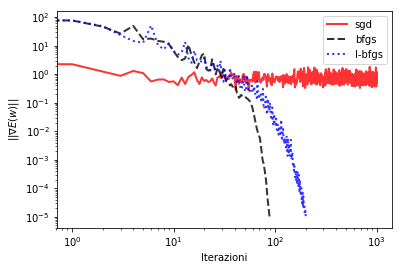

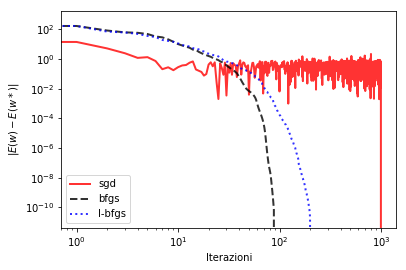

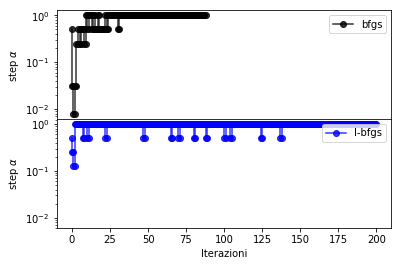

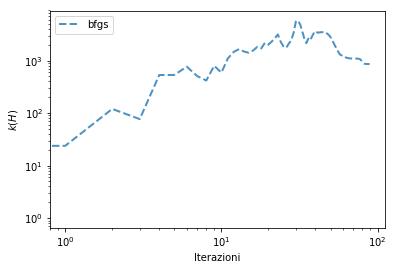

In [13]:
plot_norm_gradient_vs_iterations(norm_gradients_sgd, norm_gradients_bfgs, norm_gradients_lbfgs)
plot_relative_gap_vs_iterations(list(loss_tr_sgd), list(loss_tr_bfgs), list(loss_tr_lbfgs))
plot_alpha_vs_iterations(alphas_bfgs, alphas_lbfgs)
plot_condition_number_vs_iterations(cond_bfgs, cond_lbfgs=None)

## 4) Machine Learning plots
- training and validation loss vs iterations

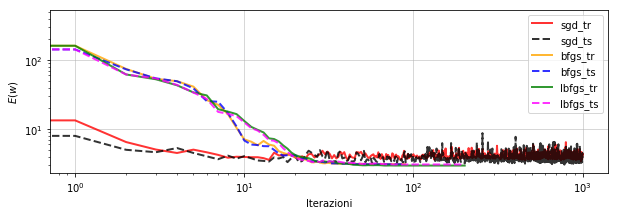

In [14]:
plot_all_loss(error_tr_sgd, loss_ts_sgd, error_tr_bfgs, loss_ts_bfgs, error_tr_lbfgs, loss_ts_lbfgs,\
             xscale='log', yscale='log')